<a href="https://colab.research.google.com/github/muralianamalatibco/pythonlearning/blob/main/Perception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
x,y=datasets.make_blobs(n_samples=200,
                   n_features=2,
                   centers=[[2,2],[6,6]],
                   center_box=(0,10),
                   cluster_std=1)


In [ ]:
x

array([[ 2.91743923,  2.05423176],
       [ 2.33378224,  0.70551083],
       [ 1.46500191,  0.55115419],
       [ 4.09275507,  2.78726515],
       [ 6.71348812,  6.49188876],
       [ 3.89338914,  3.11550336],
       [ 3.4666212 ,  0.57628105],
       [ 6.29056222,  4.00314642],
       [ 2.33977176,  2.78131518],
       [ 5.18681501,  4.26130682],
       [ 1.4741219 ,  2.51827955],
       [ 1.07306965,  3.0132964 ],
       [ 2.33059762,  0.22172324],
       [ 4.76923405,  0.14935845],
       [ 1.68175326,  1.4226702 ],
       [ 2.78880092,  2.34526406],
       [ 0.81995646,  0.47172109],
       [ 4.45443951,  5.70385861],
       [ 4.5283595 ,  4.79044186],
       [ 5.82468015,  5.08881246],
       [ 0.44967419,  2.55595302],
       [ 5.51656063,  5.30320733],
       [ 1.24431396,  3.05220713],
       [ 2.28707329,  2.685624  ],
       [ 6.89933648,  5.57897277],
       [ 6.26340057,  5.20443411],
       [ 3.22329022, -0.16147854],
       [ 1.77943159,  2.53247939],
       [ 6.5211324 ,

In [ ]:
y

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1])

In [ ]:
# this is to ensure that wherever we have class label as 0 convert it into -1
y[y==0]=-1
# y

In [ ]:
def show(w,w0,x,y):
    x_val=np.linspace(-5,10)
    y_val= (-w[0]*x_val-w0)/w[1]
    plt.plot(x_val,y_val)
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.xlim(x[:,0].min()+0.2,x[:,0].max()+0.2)
    plt.ylim(x[:,1].min()+0.2,x[:,1].max()+0.2)
    plt.show()

In [ ]:
# defining a random weight vetor and the w0 from a normal distibution
w=np.random.normal(size=(2,))
w0=np.random.normal()
print(w,w0)
print(w[0],w[1],w0)

[0.68947858 1.51333141] 0.693290503174456
0.6894785845248399 1.5133314125659474 0.693290503174456


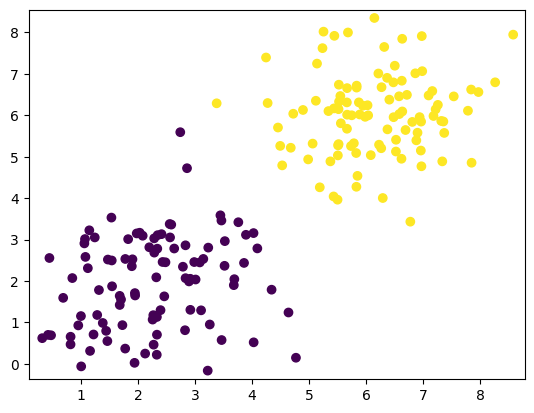

In [ ]:
show(w,w0,x,y)


In [ ]:
# computing distance from the hyperplane

def dist_from_hyperplane(w,w0,x):
    d = (np.dot(w,x)+w0)/np.linalg.norm(w)
    return d

In [ ]:
#training the perceptron model

def perceptron_training(x,y,w,w0,num_iter=100):
    for i in range(num_iter):
        print("Iteration Number : ",i+1)
        miss_classified_points=0
        for (xi,yi) in zip(x,y):
            d=dist_from_hyperplane(w,w0,xi)
            hs = np.sign(d) #........this gives us the assigned label
            if hs != np.sign(yi): #.......here we are checking if the assigned and the actual label is same or not
                miss_classified_points += 1
                w = w + (xi*yi)
                w0 = w0 + np.sign(yi)
        print(f"Current Accuracy : {100-(100*miss_classified_points/len(y))}")
        print(f"Weights are W1 : {w[0]}, W2 : {w[1]}, W0 : {w0}")
        show(w,w0,x,y)
        if miss_classified_points==0:
            return w,w0
    return w, wo

Iteration Number :  1
Current Accuracy : 86.5
Weights are W1 : 7.15968541119117, W2 : -0.7438084334791109, W0 : -10.306709496825544


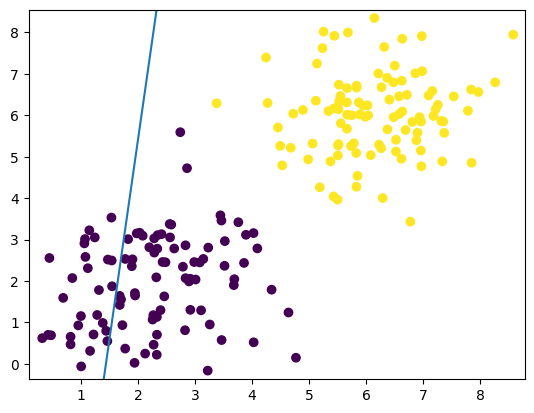

Iteration Number :  2
Current Accuracy : 85.0
Weights are W1 : 4.60954806254297, W2 : -0.12001045763476981, W0 : -22.306709496825544


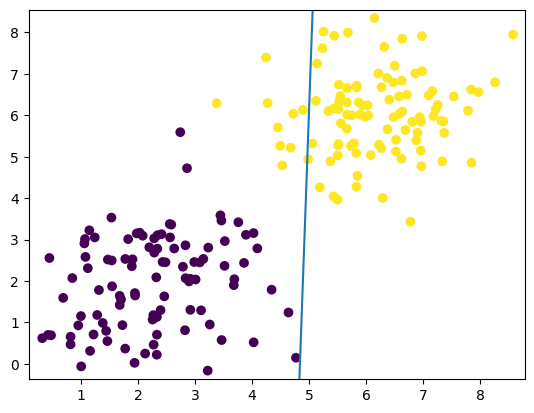

Iteration Number :  3
Current Accuracy : 94.0
Weights are W1 : 9.490329635354632, W2 : 2.0349632856447064, W0 : -26.306709496825544


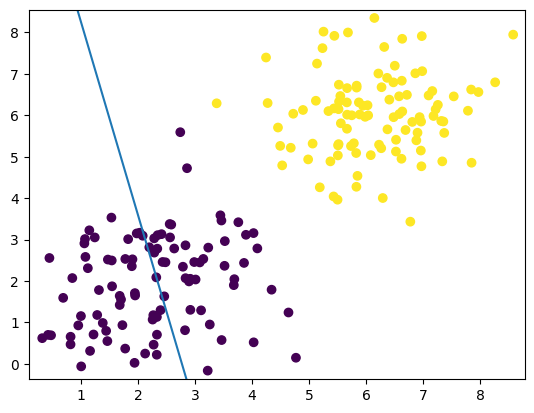

Iteration Number :  4
Current Accuracy : 98.0
Weights are W1 : 3.97102258788259, W2 : 2.849607694594445, W0 : -28.306709496825544


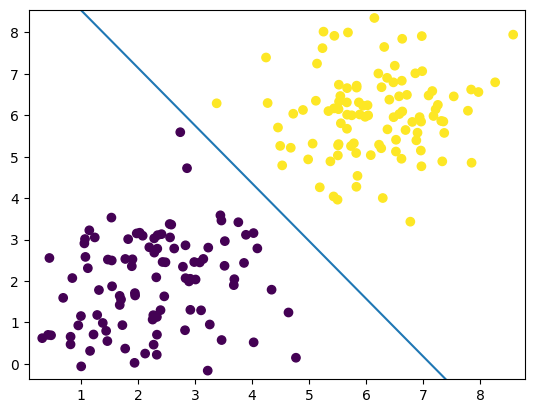

Iteration Number :  5
Current Accuracy : 100.0
Weights are W1 : 3.97102258788259, W2 : 2.849607694594445, W0 : -28.306709496825544


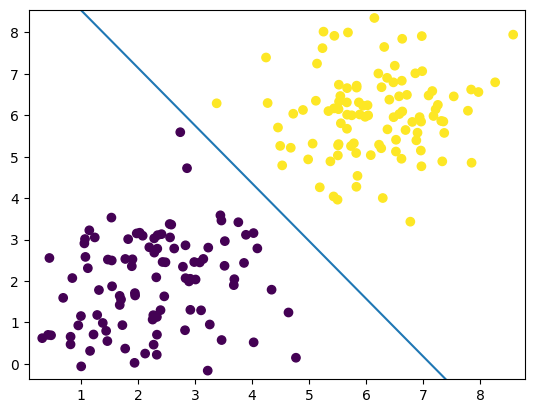

In [ ]:
w,wo=perceptron_training(x,y,w,w0)
